In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline
batch_size = 16


In [4]:
mnist_train = dset.MNIST("../", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST("../", train=False, transform=transforms.ToTensor(), download=True)

batch_size = 16
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw


Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [17]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        input_size = 28*28
        latent_size = 2
        output_size = 28*28

        self.encoder = nn.Linear(input_size,latent_size)
        self.decoder = nn.Linear(latent_size, output_size)

    def forward(self,x):
        x = x.view(batch_size, -1)
        z = self.encoder(x)
        out = self.decoder(z).view(batch_size,1,28,28)
        return out,z

model = AutoEncoder().cuda()

In [18]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)

In [20]:
epoch = 5
for i in range(epoch):
  for j,(img,label) in enumerate(train_loader):
    optimizer.zero_grad()

    x = img.cuda()
    output,_ = model(x)
    loss = loss_func(output,x)

    loss.backward()
    optimizer.step()

  print('loss is', loss.item())

loss is 0.06057467684149742
loss is 0.061535511165857315
loss is 0.05448716878890991
loss is 0.06246583163738251
loss is 0.057010021060705185


torch.Size([16, 28, 28])


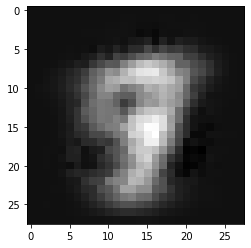

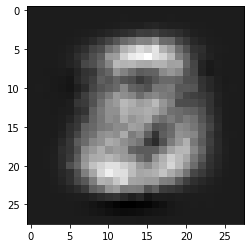

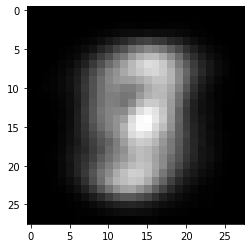

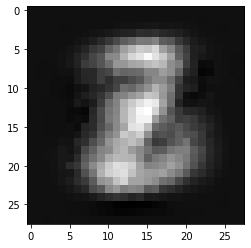

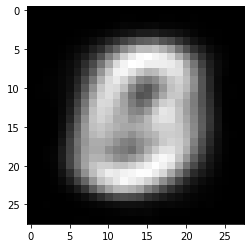

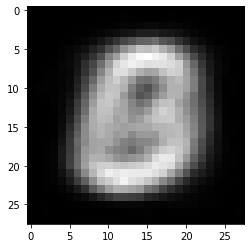

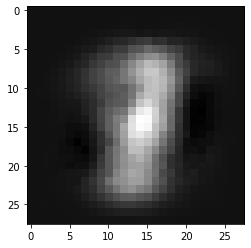

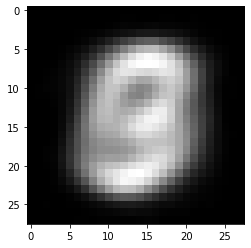

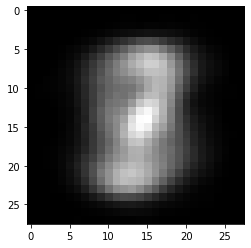

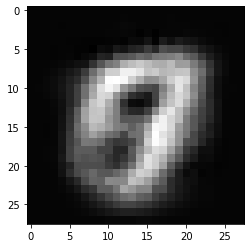

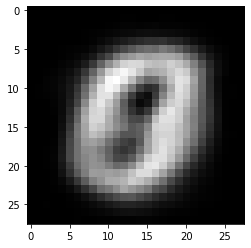

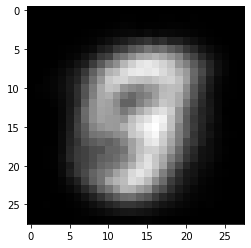

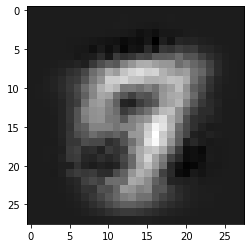

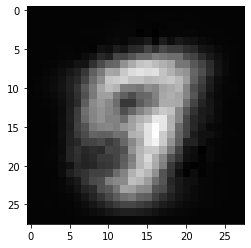

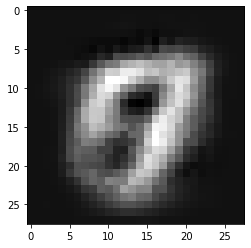

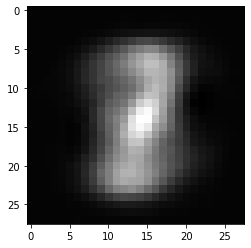

In [33]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
for i in range(out_img.size()[0]):
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()